In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('/media/sf_Shared_Folder/ML_ZoomCamp/housing.csv')

In [3]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


**Filling Null Values with 0**

In [4]:
a=df.isnull().sum()
a

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(value=0,inplace=False)

In [7]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [8]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [9]:
df.mode(axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-118.31,34.06,52.0,1527.0,0.0,891.0,306.0,3.1250,500001.0,<1H OCEAN,5.0,0.0,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0001,NaN,NaN,NaN,NaN,NaN


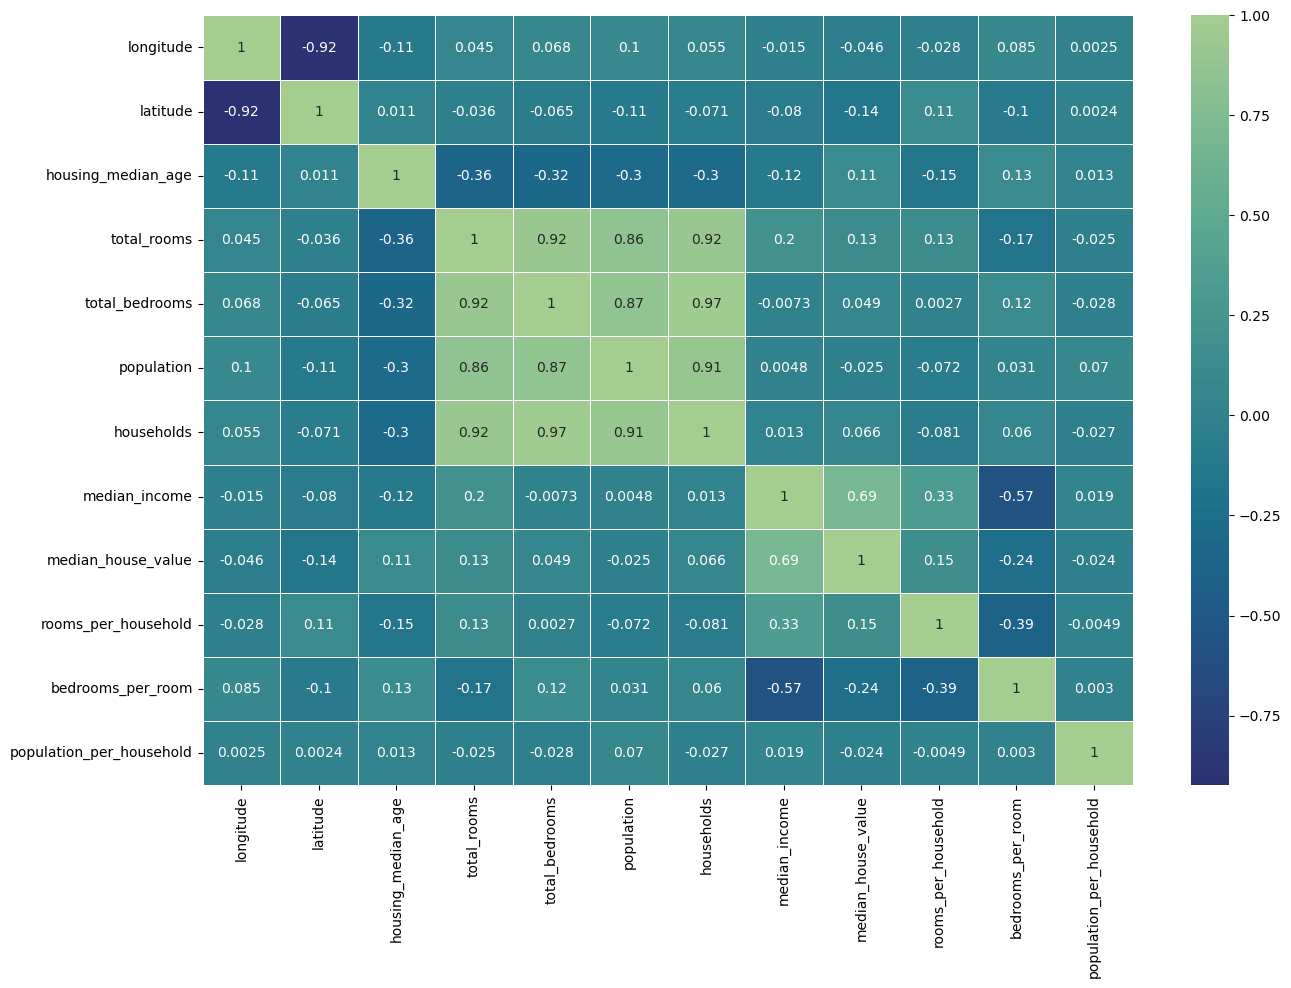

In [10]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, lw = 0.5, cmap  = 'crest_r')
plt.show()

**Make median_house_value binary**

In [11]:
m=df["median_house_value"].mean()
m

206855.81690891474

In [12]:
conditions = [
    (df["median_house_value"] >= m),
    (df["median_house_value"] < m),
    ]

values = [1, 0]

df["above_average"] = np.select(conditions, values)

In [13]:
df['above_average'] = df.above_average.astype('category')

In [14]:
df = df.drop('median_house_value',axis=1)

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467,1


**Data splitting  in train/val/test sets, with 60%/20%/20%**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [18]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

**Reset index and data isolation(Features and Target)**

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.above_average.values
y_val   = df_val.above_average.values
y_test  = df_test.above_average.values

X_train = df_train.drop('above_average',axis=1)
X_val   = df_val.drop('above_average',axis=1)
X_test  = df_test.drop('above_average',axis=1)



**Calculate the mutual information score For the training set**

In [21]:
from sklearn.metrics import mutual_info_score

In [22]:
def mutual_info_mhv_score(series):
    return mutual_info_score(series, df_train.above_average)

In [23]:
categoricals=['ocean_proximity']
numericals= ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']
all = categoricals + numericals

In [24]:
mi = df_train[categoricals].apply(mutual_info_mhv_score)
mi.sort_values(ascending=False)

ocean_proximity    0.101384
dtype: float64

In [25]:
mi = df_train[all].apply(mutual_info_mhv_score)
mi.sort_values(ascending=False)

/home/shakorms/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/shakorms/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/shakorms/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/shakorms/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warn

bedrooms_per_room           0.654318
rooms_per_household         0.651019
population_per_household    0.637922
median_income               0.521072
total_rooms                 0.268250
longitude                   0.178880
population                  0.175275
latitude                    0.156040
ocean_proximity             0.101384
total_bedrooms              0.085501
households                  0.079897
housing_median_age          0.013672
dtype: float64

**One Hot Encoding**

In [26]:
from sklearn.feature_extraction import DictVectorizer

In [27]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categoricals + numericals].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categoricals + numericals].to_dict(orient='records')
X_val = dv.transform(val_dict)

 **train a logistic regression**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

**Calculate the accuracy on the validation dataset**

In [30]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)

score =accuracy_score(y_val,y_pred)
score

0.8364825581395349